# Sensitivity of results for cost factor water transport

## Relative errors mean annual fluxes


In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

<Figure size 1280x400 with 0 Axes>

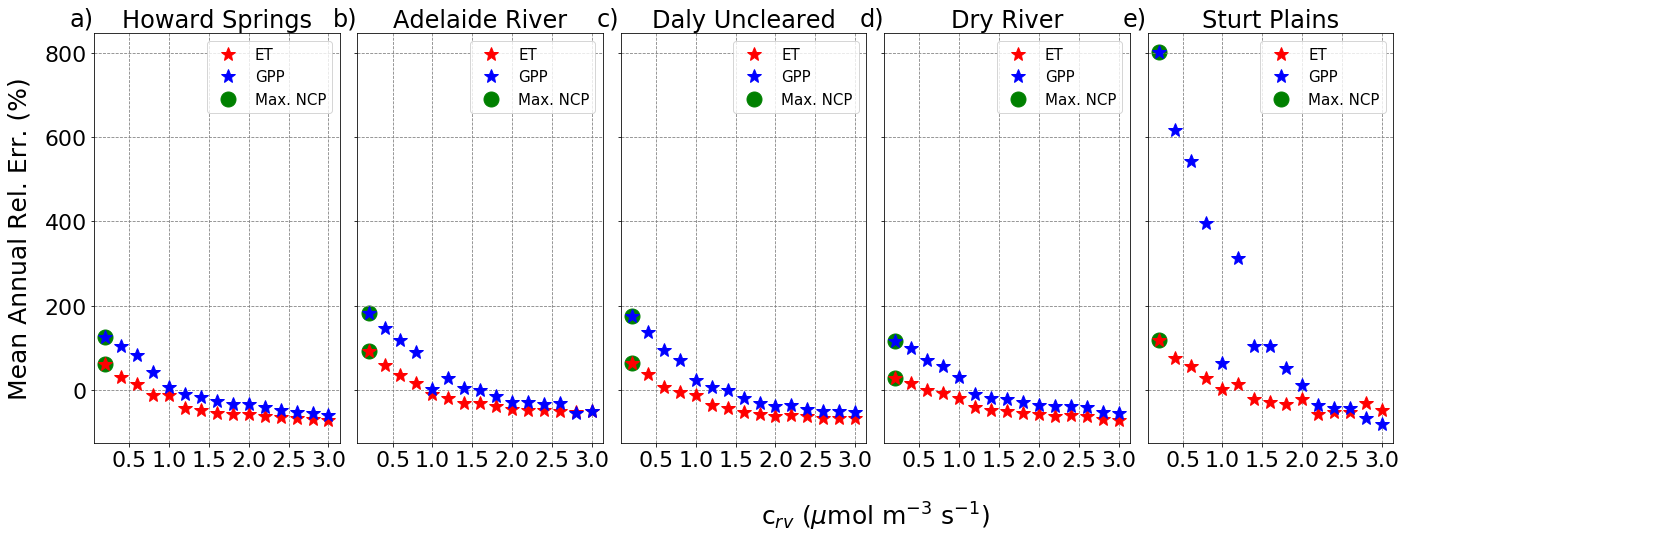

In [3]:

#load data
cpcff_vals = np.arange(0.2, 3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "DalyUncleared", "DryRiver", "SturtPlains" ]
site_names = ["Howard Springs", "Adelaide River", "Daly Uncleared", "Dry River", "Sturt Plains" ]
fig_lab = ["a)", "b)", "c)", "d)" , "e)", "f)"]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=6, figsize=(24, 8), sharex=True, sharey=True) 
fig.delaxes(ax[5]) #remove last plot


i = 0

skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    i_cpcff = 0
    NCPmax = 0
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt", skip_header = 1) #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt", skip_header = 1) #mm/d        

            infile = ["../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_best/results_daily.txt"]
            #get NCP-value
            data = np.genfromtxt(infile[0], names=True)
            
            if( (np.sum(data["ncp_g"]) + np.sum(data["ncp_t"])) > NCPmax ):
                NCPmax = np.sum(data["ncp_g"]) + np.sum(data["ncp_t"])
                cpcff_ncpmax = cpcff_vals[i_cpcff]
                reass_ncpmax = assbest_stats[1]*100
                ree_ncpmax = ebest_stats[1]*100
                
            if(loc  == 1):
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1]*100, '*r', markersize=15, label="ET" ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1]*100, '*b', markersize=15, label="GPP" )
            else:
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1]*100, '*r', markersize=15 ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1]*100, '*b', markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
    ax[i].set_title(site_names[i], size=24  );

    #plot solutions with highest NCP-value
    ax[i].plot(cpcff_ncpmax, reass_ncpmax, 'o', color = "green", markersize=15, label="Max. NCP", zorder=0 ) 
    ax[i].plot(cpcff_ncpmax, ree_ncpmax, 'o', color = "green", markersize=15, zorder=0) 

    ax[i].grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    ax[i].legend(prop={'size':15});
    ax[i].text(-0.1, 1.02, fig_lab[i], transform=ax[i].transAxes,  size=24)

    i = i +1


fig.add_subplot(111, frameon=False);
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'c$_{rv}$ ($\mu$mol m$^{-3}$ s$^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.tight_layout()
plt.show()



**Figure S3.1.** Relative errors for mean annual fluxes, for different values of the cost factor for water transport and the different study sites of a) Howard Springs, b) Adelaide River, c) Daly Uncleared, d) Dry River and e) Sturt Plains. Assimilation is shown in blue, total evaporation in red, and the solution with the highest NCP is marked in green. The relative errors go down for higher values of the cost factor in most cases, and even change sign (positive errors to negative errors). Sturt Plains still shows a large errors for the assimilation for lower values of the cost factor. 


## Timeseries

<Figure size 1280x960 with 0 Axes>

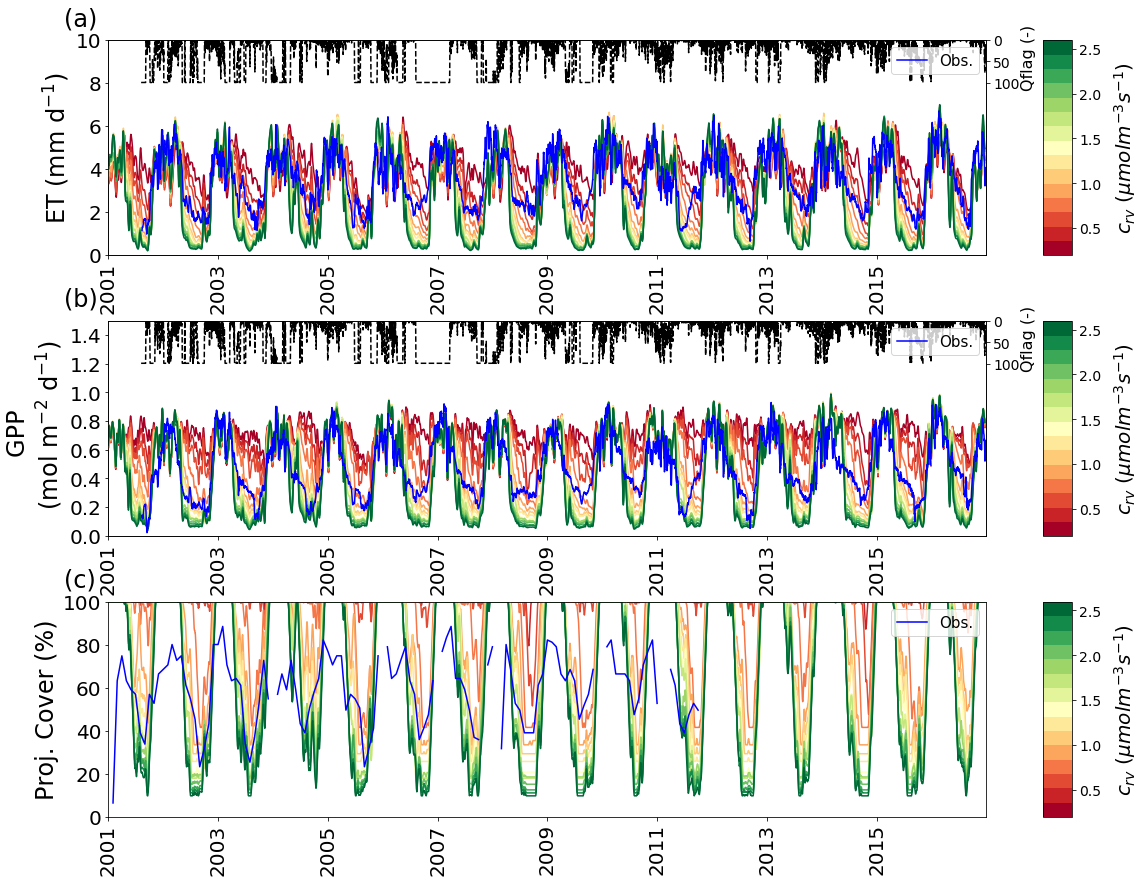

In [4]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016  \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.05 --yloc_title 1.10 --size_title 24 --moving_average 7 --palette RdYlGn \
--plot_cbar --cblabel "$c_{rv}$ ($\mu mol m^{-3} s^{-1})$" \
--var "evaptot" "asstot" "pc" \
--figsize 16 12 --ymax 10 1.5 100 --ymin 0 0 0 --wpad 2

**Figure S3.2.** VOM-results for different values of the cost factor c$_{rv}$ (color scale) for Howard Springs from 2001-2016 (subset from 1980-2016), with a) the evapo-transpiration (ET), with flux tower observations in blue b) gross primary productivity (GPP), with flux tower observations in blue and c) projective cover, with the observed fraction of vegetation cover based on fPAR-data (Donohue et al, 2008) in blue. Modelled ET and GPP are smoothed with a moving average of 7 days.

<Figure size 1280x960 with 0 Axes>

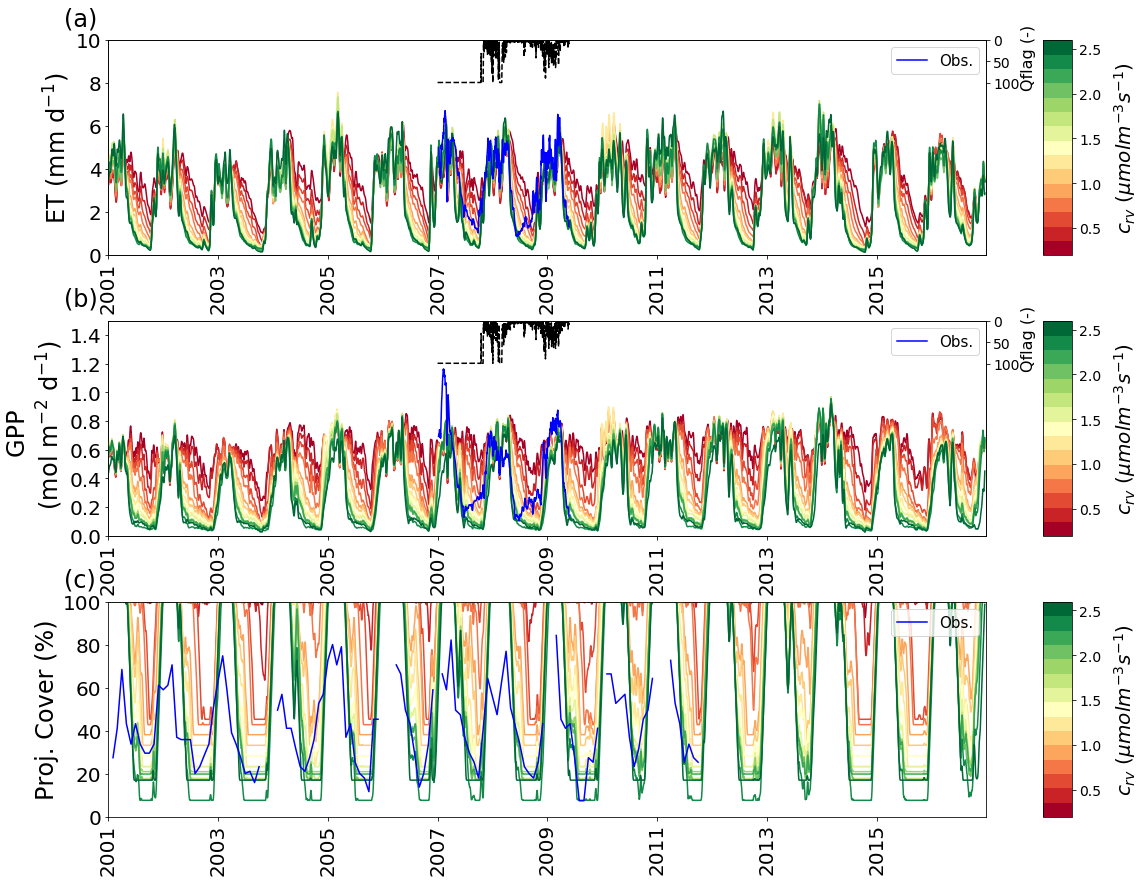

In [5]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--assobs ../../data/DINGO/GPPdaily_adelaide.txt --assobs_qc ../../data/DINGO_QC/FcQ_adelaide.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_adelaide.txt --eobs ../../data/DINGO/Ea_adelaide.txt \
--pcobs ../../data/fPAR/fpar_adelaide_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.05 --yloc_title 1.10 --size_title 24 --moving_average 7 --palette RdYlGn \
--plot_cbar --cblabel "$c_{rv}$ ($\mu mol m^{-3} s^{-1})$" \
--var "evaptot" "asstot" "pc" \
--figsize 16 12 --ymax 10 1.5 100 --ymin 0 0 0 --wpad 2 

**Figure S3.3.** VOM-results for different values of the cost factor c$_{rv}$ (color scale) for Adelaide River from 2001-2016 (subset from 1980-2016), with a) the evapo-transpiration (ET), with flux tower observations in blue b) gross primary productivity (GPP), with flux tower observations in blue and c) projective cover, with the observed fraction of vegetation cover based on fPAR-data (Donohue et al, 2008) in blue. Modelled ET and GPP are smoothed with a moving average of 7 days.

<Figure size 1280x960 with 0 Axes>

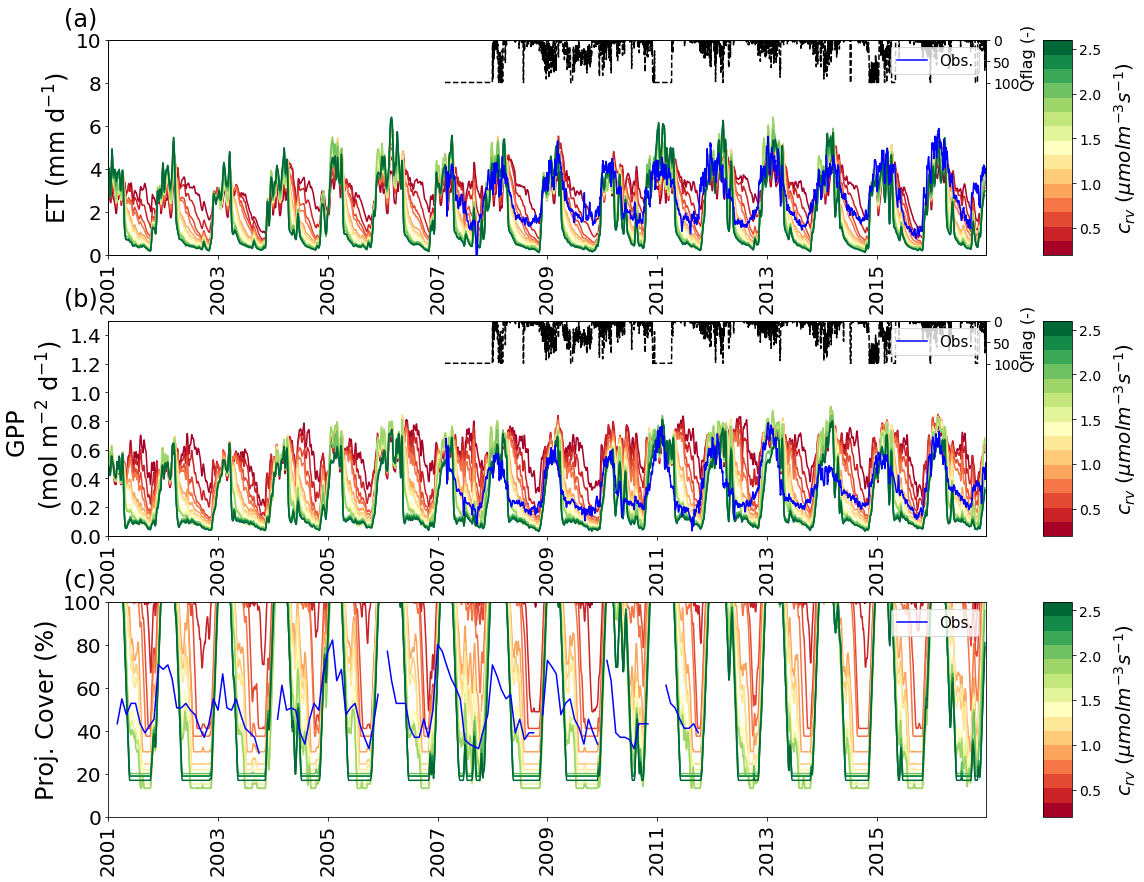

In [6]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--assobs ../../data/DINGO/GPPdaily_daly.txt --assobs_qc ../../data/DINGO_QC/FcQ_daly.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_daly.txt --eobs ../../data/DINGO/Ea_daly.txt \
--pcobs ../../data/fPAR/fpar_daly_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.05 --yloc_title 1.10 --size_title 24 --moving_average 7 --palette RdYlGn \
--plot_cbar --cblabel "$c_{rv}$ ($\mu mol m^{-3} s^{-1})$" \
--var "evaptot" "asstot" "pc" \
--figsize 16 12 --ymax 10 1.5 100 --ymin 0 0 0 --wpad 2

**Figure S3.4.** VOM-results for different values of the cost factor c$_{rv}$ (color scale) for Daly Uncleared from 2001-2016 (subset from 1980-2016), with a) the evapo-transpiration (ET), with flux tower observations in blue b) gross primary productivity (GPP), with flux tower observations in blue and c) projective cover, with the observed fraction of vegetation cover based on fPAR-data (Donohue et al, 2008) in blue. Modelled ET and GPP are smoothed with a moving average of 7 days.

<Figure size 1280x960 with 0 Axes>

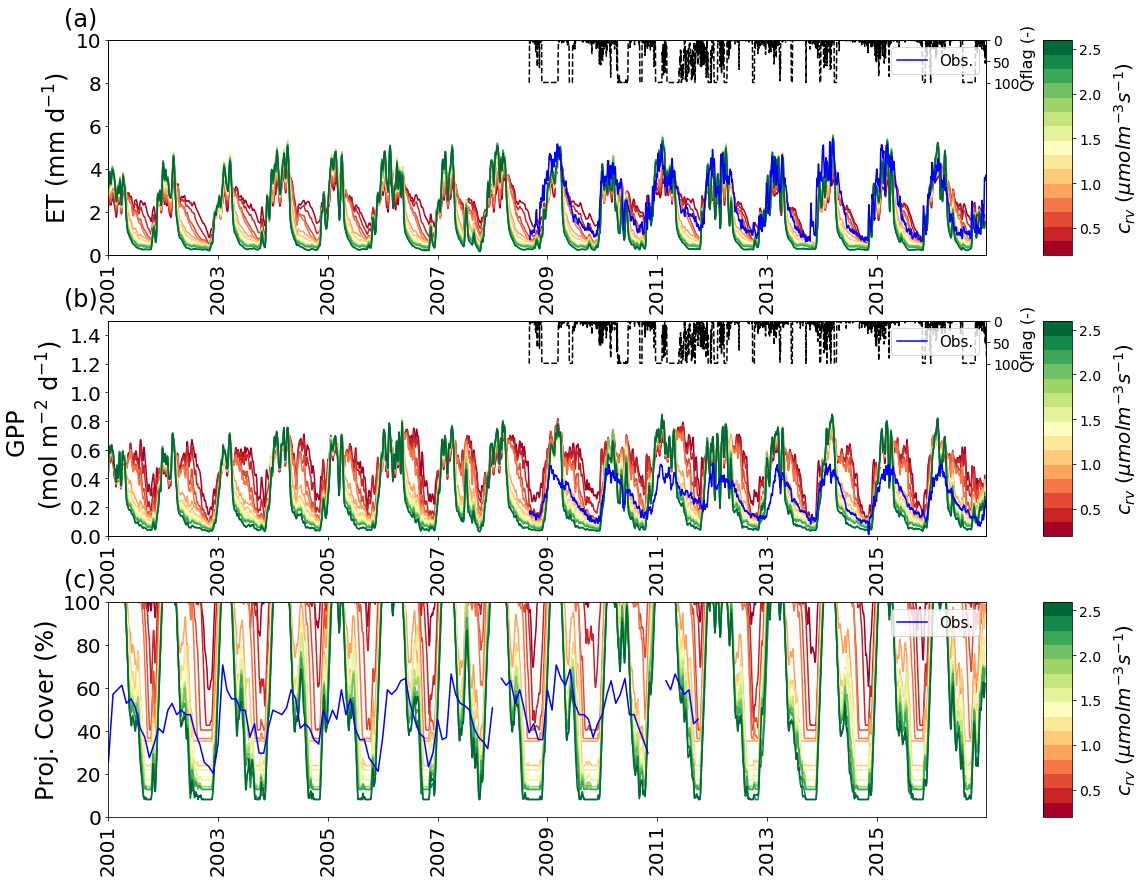

In [7]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--assobs ../../data/DINGO/GPPdaily_dry.txt --assobs_qc ../../data/DINGO_QC/FcQ_dry.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_dry.txt --eobs ../../data/DINGO/Ea_dry.txt \
--pcobs ../../data/fPAR/fpar_dry_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.05 --yloc_title 1.10 --size_title 24 --moving_average 7 --palette RdYlGn \
--plot_cbar --cblabel "$c_{rv}$ ($\mu mol m^{-3} s^{-1})$" \
--var "evaptot" "asstot" "pc" \
--figsize 16 12 --ymax 10 1.5 100 --ymin 0 0 0 --wpad 2

**Figure S3.5.** VOM-results for different values of the cost factor c$_{rv}$ (color scale) for Dry River from 2001-2016 (subset from 1980-2016), with a) the evapo-transpiration (ET), with flux tower observations in blue b) gross primary productivity (GPP), with flux tower observations in blue and c) projective cover, with the observed fraction of vegetation cover based on fPAR-data (Donohue et al, 2008) in blue. Modelled ET and GPP are smoothed with a moving average of 7 days.

<Figure size 1280x960 with 0 Axes>

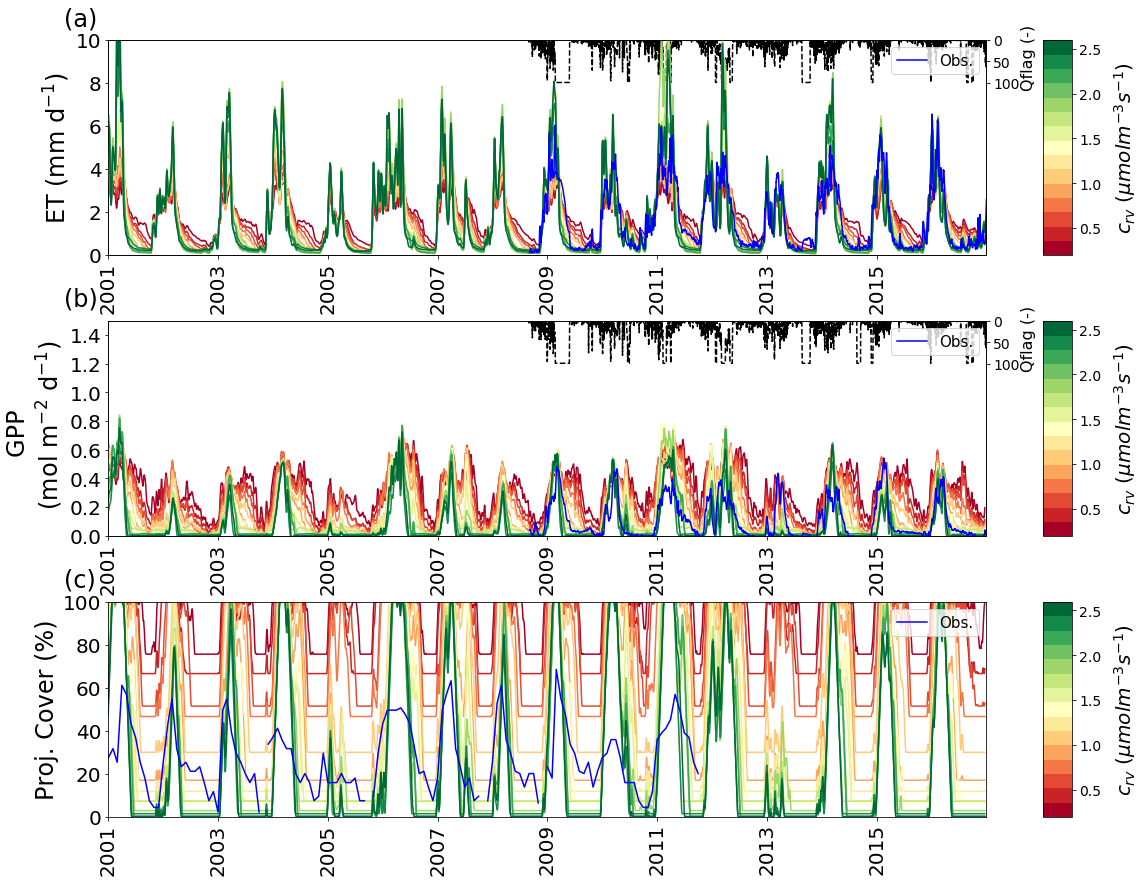

In [8]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff3.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--assobs ../../data/DINGO/GPPdaily_sturt.txt --assobs_qc ../../data/DINGO_QC/FcQ_sturt.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_sturt.txt --eobs ../../data/DINGO/Ea_sturt.txt \
--pcobs ../../data/fPAR/fpar_sturt_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.05 --yloc_title 1.10 --size_title 24 --moving_average 7 --palette RdYlGn \
--plot_cbar --cblabel "$c_{rv}$ ($\mu mol m^{-3} s^{-1})$" \
--var "evaptot" "asstot" "pc" \
--figsize 16 12 --ymax 10 1.5 100 --ymin 0 0 0 --wpad 2

**Figure S3.6.** VOM-results for different values of the cost factor c$_{rv}$ (color scale) for Sturt Plains from 2001-2016 (subset from 1980-2016), with a) the evapo-transpiration, with flux tower observations in blue b) gross primary productivity (GPP), with flux tower observations in blue and c) projective cover, with the observed fraction of vegetation cover based on fPAR-data (Donohue et al, 2008) in blue. Modelled ET and GPP are smoothed with a moving average of 7 days.

## Effect on parameter values

<Figure size 1280x400 with 0 Axes>

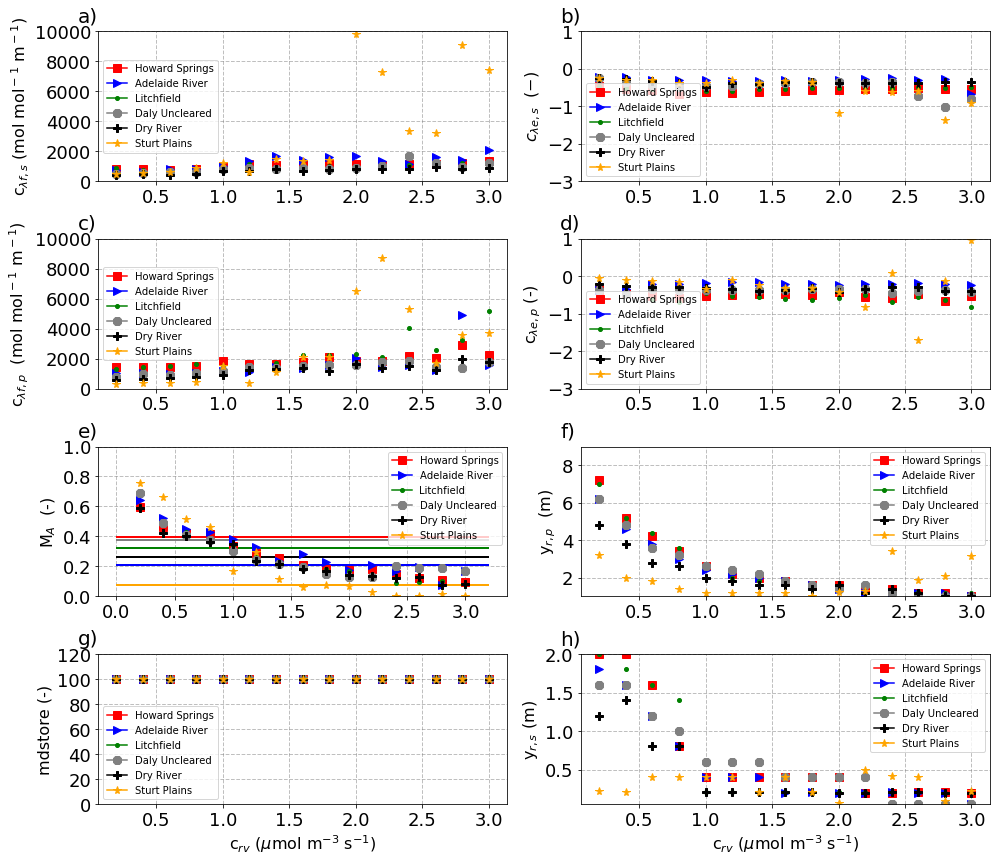

In [9]:
#plot parameters
cpcff_vals = np.arange(0.2, 3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
site_name = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 


symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12)) 
ax = axes.flat

i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                  "/best/input/pars.txt")
            

            for i in range(0,8):
                if(i_cpcff ==0):
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site_name[ibasin])     
                else:
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                if(i == 4):
                    ax[i].hlines( cai_fpar[ibasin], 0, 3.2, color = colors[ibasin] )

                    
                for tick in ax[i].xaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
                for tick in ax[i].yaxis.get_major_ticks():
                    tick.label.set_fontsize(18)
                ax[i].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

                    
                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
        
ax[0].set_ylabel(r"c$_{\lambda f,s}$ (mol mol$^-$$^1$ m$^-$$^1$)", size=16 )  
ax[0].set_ylim( 0, 10000  )    
ax[0].legend(prop={'size':10}, loc='center left')
ax[0].text(-0.05, 1.1, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
    
ax[1].set_ylabel(r"$c_{\lambda e,s}$  $(-)$", size=16 )  
ax[1].set_ylim( -3, 1  )    
ax[1].legend(prop={'size':10})
ax[1].text(-0.05, 1.1, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)
 
ax[2].set_ylabel(r"c$_{\lambda f,p}$  (mol mol$^-$$^1$ m$^-$$^1$)", size=16 )
ax[2].set_ylim( 0, 10000  )    
ax[2].legend(prop={'size':10}, loc='center left')
ax[2].text(-0.05, 1.1, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)

ax[3].set_ylabel(r"c$_{\lambda e,p}$ (-)", size=16 ) 
ax[3].set_ylim( -3, 1  )    
ax[3].legend(prop={'size':10})
ax[3].text(-0.05, 1.1, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)

ax[4].set_ylabel(r"M$_A$  (-)", size=16 )  
ax[4].set_ylim( 0, 1  )    
ax[4].legend(prop={'size':10})
ax[4].text(-0.05, 1.1, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)

ax[5].set_ylabel(r"y$_{r,p}$  (m)", size=16 )  
ax[5].set_ylim( 1, 9  )    
ax[5].legend(prop={'size':10})
ax[5].text(-0.05, 1.1, "f)", ha='left', va='center', transform=ax[5].transAxes, fontsize=20)

ax[6].set_ylabel("mdstore (-)", size=16 )  
ax[6].set_xlabel(r"c$_{rv}$ ($\mu$mol m$^{-3}$ s$^{-1}$)", size=16 )  
ax[6].set_ylim( 0, 120  )    
ax[6].legend(prop={'size':10})
ax[6].text(-0.05, 1.1, "g)", ha='left', va='center', transform=ax[6].transAxes, fontsize=20)

ax[7].set_ylabel(r"y$_{r,s}$ (m)", size=16 )  
ax[7].set_xlabel(r"c$_{rv}$ ($\mu$mol m$^{-3}$ s$^{-1}$)", size=16 )  
ax[7].set_ylim( 0.05, 2  )    
ax[7].legend(prop={'size':10})
ax[7].text(-0.05, 1.1, "h)", ha='left', va='center', transform=ax[7].transAxes, fontsize=20)



plt.tight_layout()
    
plt.show()




**Figure S3.7.** Optimal vegetation parameters for the different values of the water transport costfactor c$_{rv}$, for a) and b) the two parameters c$_{\lambda f,s}$ and  c$_{\lambda e,s}$ effecting the water use for perennial vegetation, c) and d) the two parameters c$_{\lambda f,p}$ and c$_{\lambda e,p}$ effecting the water use for seasonal vegetation, e) vegetation cover of the perennial vegetation M$_{A,p}$, f) the rooting depth for the perennial vegetation y$_{r,p}$ and g) the plant water storage (fixed) and h) the rooting depth for the seasonal vegetation y$_{r,s}$. The lines for the parameter M$_{A,p}$ indicate the minimum vegetation cover during the dry season derived from fPar-values. 

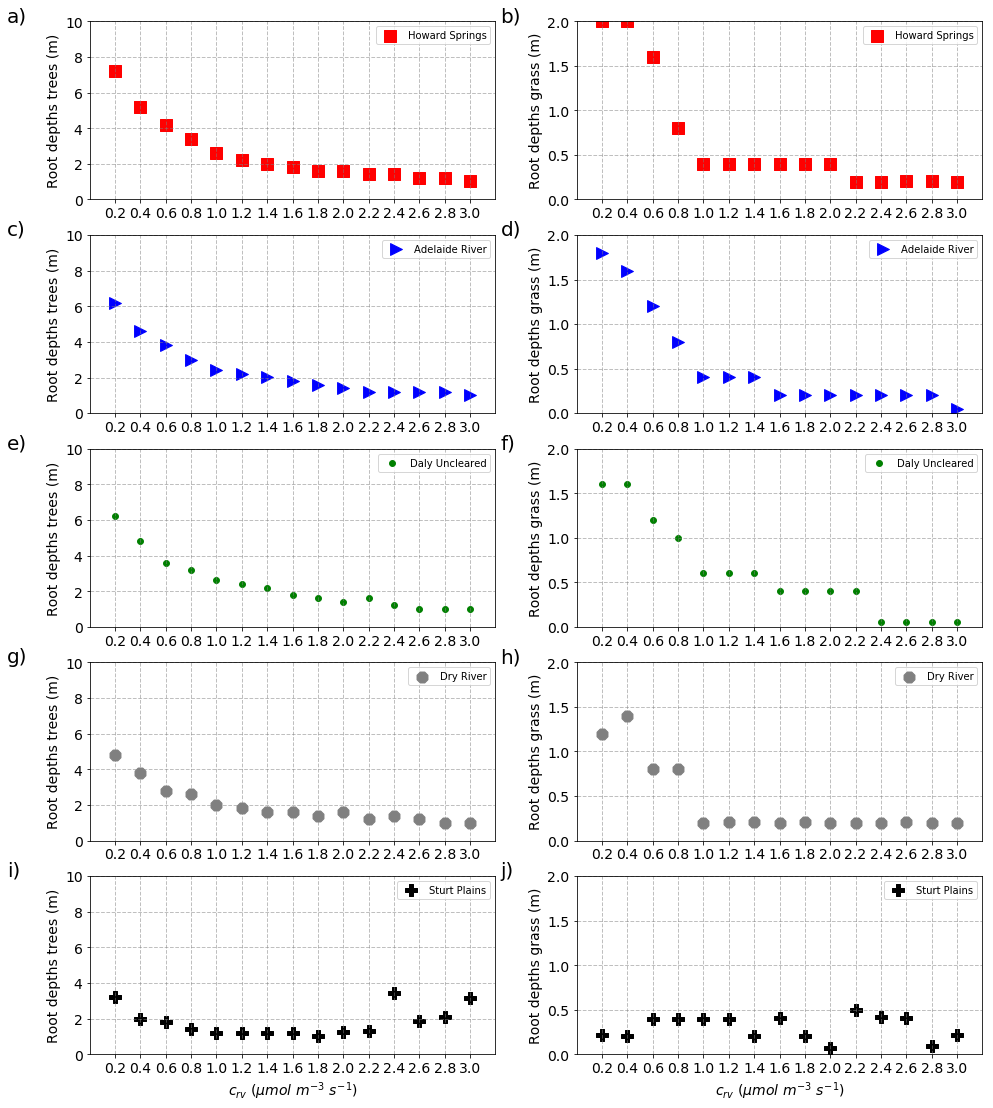

In [10]:
%run ../../src_py/plot_roots_costfactors.py \
--sites "Howard Springs" "Adelaide River" "Daly Uncleared" "Dry River" "Sturt Plains" \
--cpccf_min 0.2 --cpccf_max 3.0 --cpccf_step 0.2 \
--in1 ../../work/HowardSprings/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff3.0/best/input/pars.txt \
--in2 ../../work/AdelaideRiver/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff3.0/best/input/pars.txt \
--in3 ../../work/DalyUncleared/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff3.0/best/input/pars.txt \
--in4 ../../work/DryRiver/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff3.0/best/input/pars.txt \
--in5 ../../work/SturtPlains/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff3.0/best/input/pars.txt \
--plot_cpccf 1.0 --spa_rtdepth 6.5 \
--maespa_rtdepth 5 --cable_rtdepth 4.5 --bios2_rtdepth 5.0 --lpj_rtdepth 2.0 --spa_rgdepth 6.5 \
--maespa_rgdepth 5.0 --cable_rgdepth 4.5 --bios2_rgdepth 0.5 --lpj_rgdepth 2.0 --figsize 16 19

**Figure S3.8.** Optimal vegetation parameters for the different values of the water transport costfactor c$_{rv}$, for rooting depth trees (left column) and rooting depths grasses (right column), for a),b) Howard Springs, c),d) Adelaide River, e),f) Daly Uncleared, g), h) Dry River and i), j) Sturt Plains. 

## Effect dry season vegetation cover

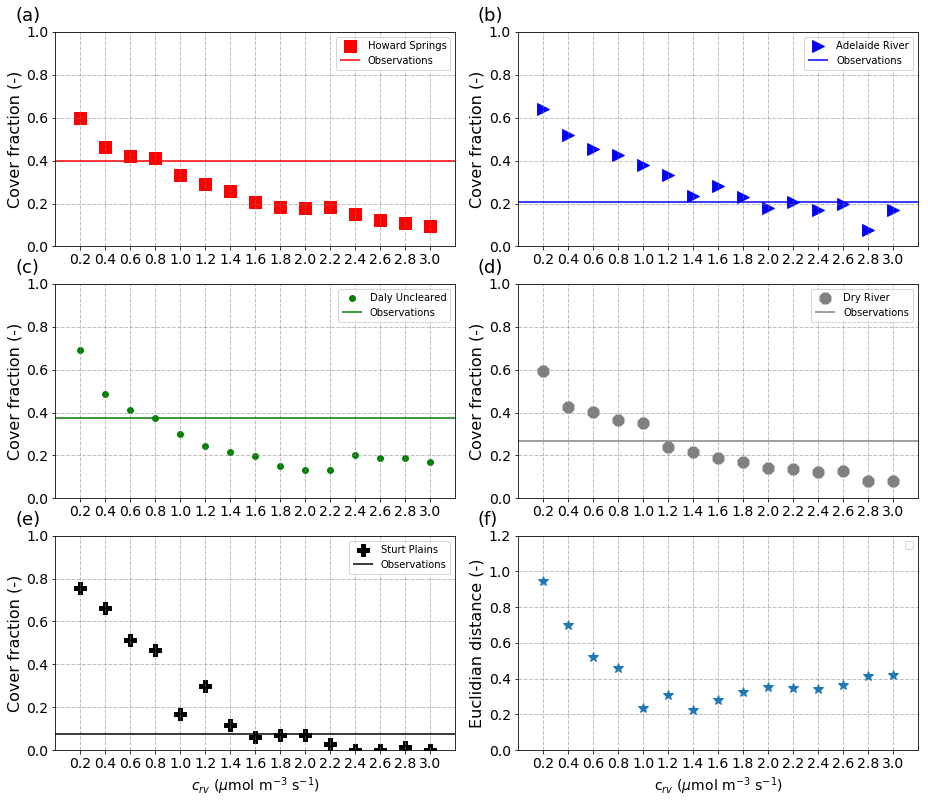

In [11]:
%run ../../src_py/plot_costfactors.py \
--sites "Howard Springs" "Adelaide River" "Daly Uncleared" "Dry River" "Sturt Plains" \
--cpccf_min 0.2 --cpccf_max 3.0 --cpccf_step 0.2 \
--in1 ../../work/HowardSprings/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/HowardSprings/freedrainage_cpcff3.0/best/input/pars.txt \
--in2 ../../work/AdelaideRiver/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/AdelaideRiver/freedrainage_cpcff3.0/best/input/pars.txt \
--in3 ../../work/DalyUncleared/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/DalyUncleared/freedrainage_cpcff3.0/best/input/pars.txt \
--in4 ../../work/DryRiver/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/DryRiver/freedrainage_cpcff3.0/best/input/pars.txt \
--in5 ../../work/SturtPlains/freedrainage_cpcff0.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff0.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.0/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff1.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.0/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.2/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.4/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.6/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff2.8/best/input/pars.txt \
../../work/SturtPlains/freedrainage_cpcff3.0/best/input/pars.txt \
--fpar1 ../../data/fPAR/fpar_howard_v5.txt --fpar2 ../../data/fPAR/fpar_adelaide_v5.txt \
--fpar3 ../../data/fPAR/fpar_daly_v5.txt --fpar4 ../../data/fPAR/fpar_dry_v5.txt \
--fpar5 ../../data/fPAR/fpar_sturt_v5.txt --fpar_dates ../../data/fPAR/dates_v5 --figsize 13 11

**Figure 3.9.** Optimal vegetation parameters for the different values of the water transport costfactor c$_{rv}$. The lines indicate the minimum vegetation cover during the dry season derived from fPar-values (Donohue et al., 2008). Also here, it can be seen that values between 0.4 $\mu$mol m$^{-3}$ s$^{-1}$ and 1.8 $\mu$mol m$^{-3}$ s$^{-1}$ reproduce best the vegetation cover (Howard Springs = 0.8 $\mu$mol m$^{-3}$ s$^{-1}$, Adelaide River >=  1.4 $\mu$mol m$^{-3}$ s$^{-1}$, Daly Uncleared =  0.8 $\mu$mol m$^{-3}$ s$^{-1}$, Dry River =  1.2 $\mu$mol m$^{-3}$ s$^{-1}$, Sturt Plains >=  1.4 $\mu$mol m$^{-3}$ s$^{-1}$).

## Influence on NCP

<Figure size 1280x400 with 0 Axes>

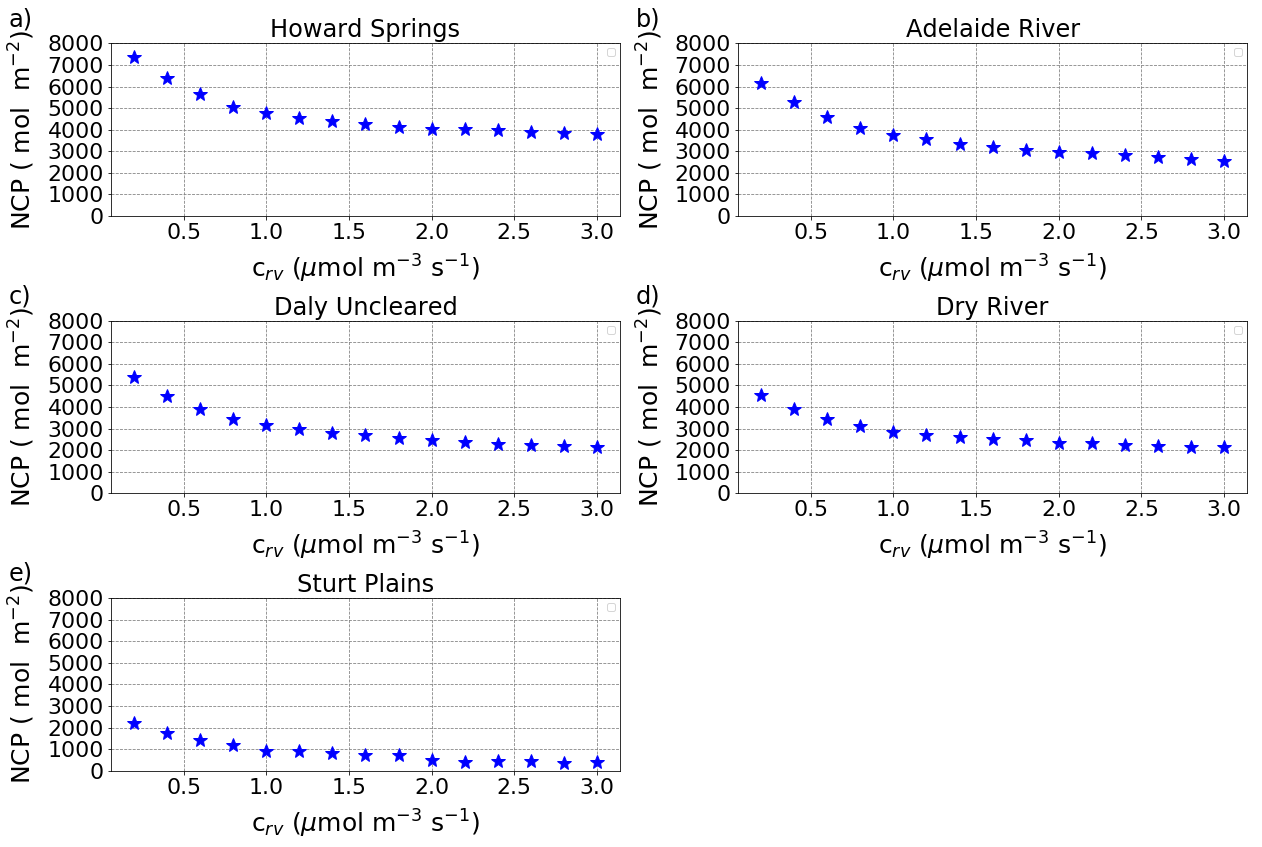

In [12]:

#load data
cpcff_vals = np.arange(0.2, 3.2, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver",  "DalyUncleared", "DryRiver", "SturtPlains" ]
site_names = ["Howard Springs", "Adelaide River", "Daly Uncleared", "Dry River", "Sturt Plains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)
fig_lab = ["a)", "b)", "c)", "d)" , "e)", "f)"]

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes   = plt.subplots(nrows=3, ncols=2, figsize=(18, 12)) 
ax = axes.flat
fig.delaxes(ax[5]) #remove last ploti = 0

i = 0
skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    i_cpcff = 0
    NCPmax = 0
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt", skip_header=1) #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt", skip_header=1) #mm/d        

            infile = ["../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_best/results_daily.txt"]
            #get NCP-value
            data = np.genfromtxt(infile[0], names=True)
            
            NCP = np.sum(data["ncp_g"]) + np.sum(data["ncp_t"])
                
            if(loc  == 1):
                ax[i].plot(cpcff_vals[i_cpcff], NCP, '*b', markersize=15 )
            else:
                ax[i].plot(cpcff_vals[i_cpcff], NCP, '*b', markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')", skip_header=1)

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
        
    ax[i].set_title(site_names[i], size=24  )

    ax[i].grid(b=True, which='major', color='grey', linestyle='--')
    ax[i].set_ylabel('NCP ( mol  m$^{-2}$)', size = 25, labelpad=10)
    ax[i].set_xlabel(r'c$_{rv}$ ($\mu$mol m$^{-3}$ s$^{-1}$)', size = 25, labelpad=10)
    ax[i].set_ylim(0,8000)

    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    ax[i].legend()
    ax[i].text(-0.2, 1.1, fig_lab[i], transform=ax[i].transAxes,  size=24)


    i = i +1

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.tight_layout()
plt.show()



**Figure 3.10.** Values of the costfactor c$_{rv}$ against the Net Carbon Profit (NCP) for with a) Howard Springs, b) Adelaide River, c) Litchfield, d) Daly Uncleared, c) Dry River, d) Sturt Plains. The NCP-values initially decrease strongly. For higher values, there decrease is less strong, but the NCP seems to keep going down. 

<Figure size 1280x400 with 0 Axes>

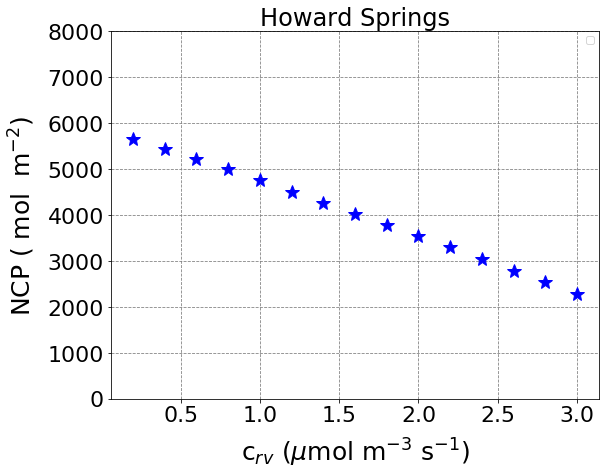

In [13]:

#load data
cpcff_vals = np.arange(0.2, 3.2, 0.2)

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)
fig_lab = ["a)", "b)", "c)", "d)" , "e)", "f)"]

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(9, 7) ) 

i = 0
skipped = 0
#loop over all sites


loc = 1
i_cpcff = 0
NCPmax = 0
#loop over all cpcff-values for the free-draining case
for label in labels:   

    try:
        infile = ["../../data/VOM_output/additional_analyses/cpcff_fixed_pars/HS_" + 
         label + "/results_daily.txt"]
        #get NCP-value
        data = np.genfromtxt(infile[0], names=True)

        NCP = np.sum(data["ncp_g"]) + np.sum(data["ncp_t"])

        if(loc  == 1):
            ax.plot(cpcff_vals[i_cpcff], NCP, '*b', markersize=15 )
        else:
            ax.plot(cpcff_vals[i_cpcff], NCP, '*b', markersize=15 ) 

    except IOError:
        skipped = skipped + 1 
        print("../../data/VOM_output/additional_analyses/cpcff_fixed_pars/HS_" + 
         label + "/results_daily.txt")


    i_cpcff = i_cpcff + 1        
    loc = loc + 2
        
        
    ax.set_title("Howard Springs", size=24  )

    ax.grid(b=True, which='major', color='grey', linestyle='--')
    ax.set_ylabel('NCP ( mol  m$^{-2}$)', size = 25, labelpad=10)
    ax.set_xlabel(r'c$_{rv}$ ($\mu$mol m$^{-3}$ s$^{-1}$)', size = 25, labelpad=10)
    ax.set_ylim(0,8000)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    ax.legend()
    #ax.text(-0.2, 1.07, fig_lab[i], transform=ax.transAxes,  size=24)


    i = i +1

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.tight_layout()
plt.show()



**Figure 3.11.** Values of the costfactor c$_{rv}$ against the Net Carbon Profit (NCP) for Howard Springs with the same vegetation parameters. The NCP-values decrease linearly here. 

## Influence on fluxes

<Figure size 1280x400 with 0 Axes>

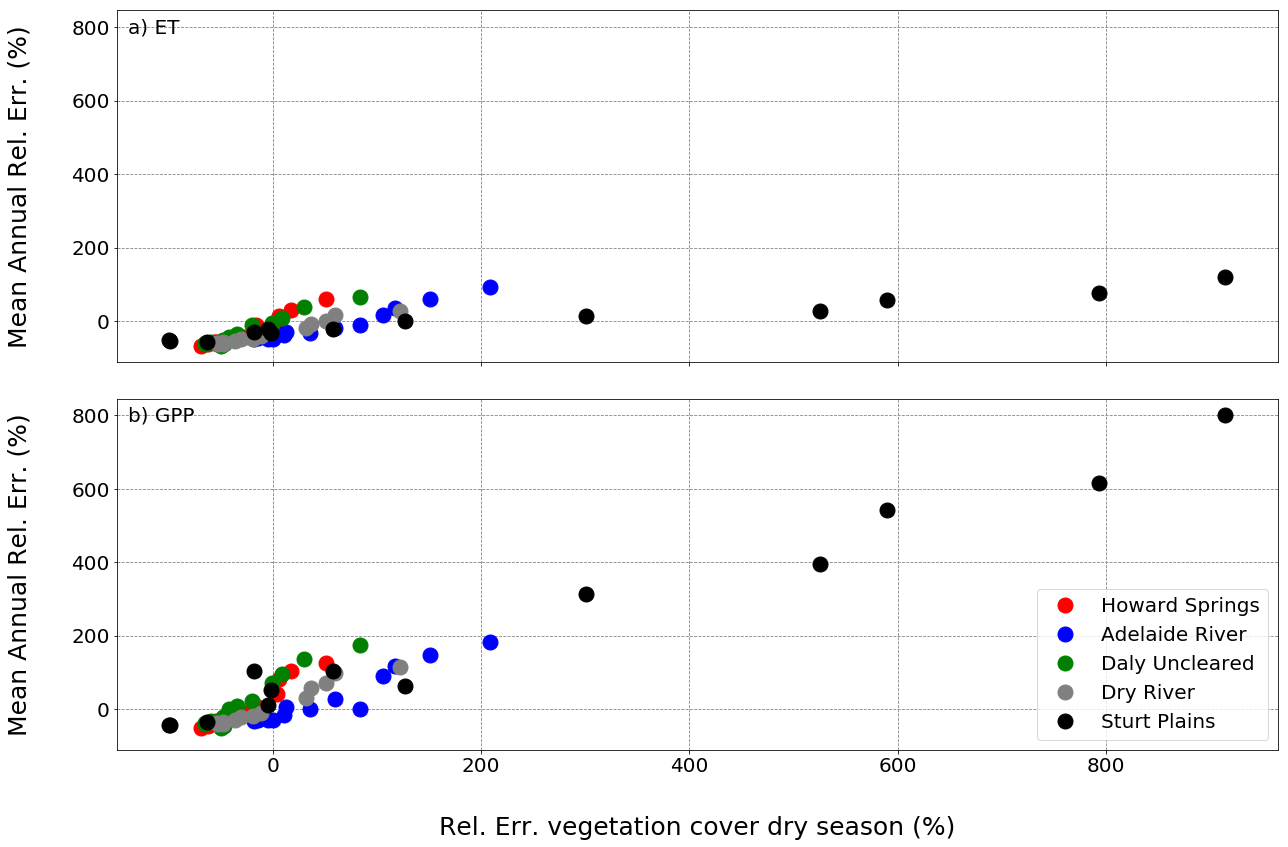

In [14]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "DalyUncleared", "DryRiver", "SturtPlains" ]
sites_name = ["Howard Springs", "Adelaide River", "Daly Uncleared", "Dry River", "Sturt Plains" ]

colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=2, ncols=1, figsize=(18, 12), sharex=True, sharey=True)   


i = 0

skipped = 0
#loop over all sites
for site in study_sites:

    loc = 1
    i_cpcff = 0
    NCPmax = 0  

    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt", skip_header=1) #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt", skip_header=1) #mm/d        

            if(cpcff == "1.0"):
                params = np.loadtxt("../../data/VOM_output/"+  site  +"/freedrainage_cpcff" + label +
                      "/sce_best/pars.txt")
            else:
                params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + label +
                      "/best/input/pars.txt")

            cai = params[4]
            err[i_cpcff, i] = 100*(cai - cai_fpar[i])/cai_fpar[i]
            
           
                
            if(loc  == 1):
                ax[0].plot(err[i_cpcff, i], ebest_stats[1]*100, 'o', color=colors[i] , markersize=15, label=sites_name[i] ) 
                ax[1].plot(err[i_cpcff, i], assbest_stats[1]*100, 'o', color=colors[i] , markersize=15, label=sites_name[i] ) 
            else:
                ax[0].plot(err[i_cpcff, i], ebest_stats[1]*100, 'o', color=colors[i], markersize=15 ) 
                ax[1].plot(err[i_cpcff, i], assbest_stats[1]*100, 'o', color=colors[i] , markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')", skip_header=1)

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
       
    i = i +1

ax[0].grid(b=True, which='major', color='grey', linestyle='--')
ax[1].grid(b=True, which='major', color='grey', linestyle='--')

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
ax[0].text(0.01, 0.95, "a) ET", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
ax[1].text(0.01, 0.95, "b) GPP", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

ax[1].set_xlabel(r'Rel. Err. vegetation cover dry season (%)', size = 25, labelpad=40)
ax[0].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[1].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.legend(loc='lower right', fontsize = 20)
plt.tight_layout()
plt.show()

    


**Figure 3.12.** The relative errors of the mean annual fluxes a) ET and b) GPP versus the relative errors for the projective cover, for the different values of the costfactor c$_{rv}$. It can be seen that a larger error in vegetation cover during the dry season also leads to a large error in the resulting fluxes. 

## Extended range of cost factors

<Figure size 1280x1040 with 0 Axes>

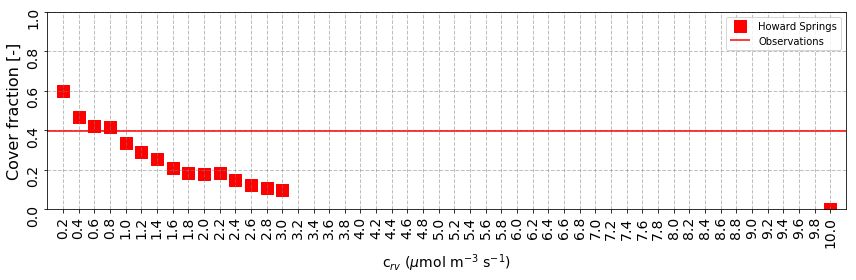

In [15]:
#plot parameters
cpcff_vals = np.arange(0.2,3.2, 0.2)
tick_vals = np.arange(0.2,10.2, 0.2)

cpcff_vals = np.append(cpcff_vals, 10.0)
study_sites = ["HowardSprings" ]
site_name = ["Howard Springs" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

tick_str = map(str, np.round(tick_vals,1) ) 
tick_str = list(tick_str)

cai_fpar = [0.3971929824561404, #HowardSprings 
0.32000000000000006, #Litchfield
0.20771929824561405, #AdelaideRiver
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']
fig_lab = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)']

fig=plt.figure(figsize=(16, 13), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4), squeeze=False) 
ax = axes.flat

site = "HowardSprings"
i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    try:
        params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                  "/best/input/pars.txt")

        cai = params[4]
        err[i_cpcff, ibasin] = cai - cai_fpar[ibasin]

        if(i_cpcff ==0):
            ax[ibasin].scatter(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , s=140, label=site_name[ibasin])     
            #ax[ibasin].plot(0.02, cai_fpar[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
            ax[ibasin].hlines( cai_fpar[ibasin], 0, 10.2, color = colors[ibasin],label = "Observations" )
            #ax[ibasin].text(-0.10, 1.05, fig_lab[ibasin], transform=ax[ibasin].transAxes, size=18)
        else:
            ax[ibasin].scatter(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , s=140)     


        ax[ibasin].set_ylabel("Cover fraction [-]", size=16 )  
        ax[ibasin].set_ylim( 0, 1  ) 

        ax[ibasin].legend(prop={'size':10})
        #if(ibasin > 3):
            #ax[ibasin].set_xlabel("cpcff [-]", size=16 )  
        ax[ibasin].set_xlabel("c$_{rv}$ ($\mu$mol m$^{-3}$ s$^{-1})$", size=14 )  


        #ax[0].text(-0.07, 1.02, "a)", transform=ax[0].transAxes, 
        #            size=20, weight='bold')
        ax[ibasin].tick_params(axis='both', which='major', labelsize=14, rotation=90)
        ax[ibasin].set_xticks(tick_vals)
        ax[ibasin].set_xticklabels(tick_str)
        ax[ibasin].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
        ax[ibasin].set_xlim( 0, 10.2  )    



    except OSError:
        print('file not found')
    i_cpcff = i_cpcff + 1
    
#combining the errors



plt.tight_layout() 
plt.show()




**Figure 3.13.** Optimal vegetation parameters for an extended range (until 10.0 $\mu$mol m$^{-3}$ s$^{-1}$) of the water transport costfactor c$_{rv}$ for Howard Springs. The lines indicate the minimum vegetation cover during the dry season derived from fPar-values. 

<Figure size 1280x960 with 0 Axes>

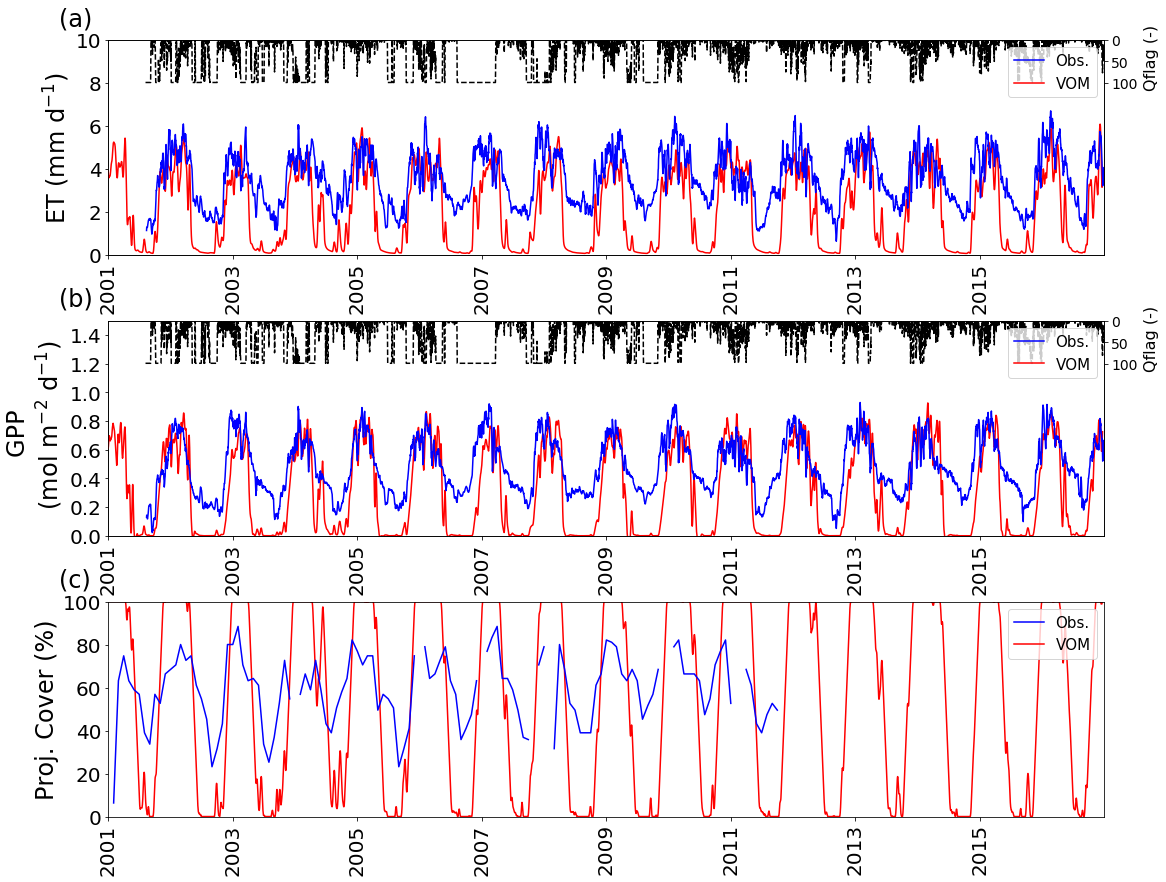

In [16]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff10.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016  \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.05 --yloc_title 1.10 --size_title 24 --moving_average 7 --palette RdYlGn \
--var "evaptot" "asstot" "pc" \
--figsize 16 12 --ymax 10 1.5 100 --ymin 0 0 0 --wpad 2

**Figure S3.14.** VOM-results for a cost factor c$_{rv}$ of 10.0 $\mu mol m^{-3} s^{-1})$ (red) for Howard Springs from 2001-2016 (subset from 1980-2016), with a) the evapo-transpiration (ET), with flux tower observations in blue b) gross primary productivity (GPP), with flux tower observations in blue and c) projective cover, with the observed fraction of vegetation cover based on fPAR-data (Donohue et al, 2008) in blue. Modelled ET and GPP are smoothed with a moving average of 7 days.